In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
mean_01=np.array([1,1])
cov_01=np.array([[1,0.1],[0,1.2]])

mean_02=np.array([5,5])
cov_02=np.array([[1,0.1],[0.1,1.2]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)

dist_02=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(np.cov(dist_01.T))

(500, 2)
[[ 0.96641117  0.03562041]
 [ 0.03562041  1.18039653]]


/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


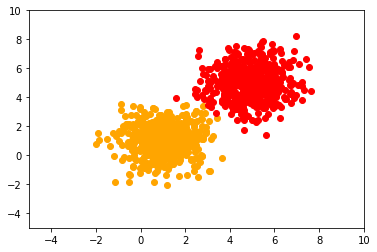

In [25]:
plt.figure(0)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist_01[:,0],dist_01[:,1],color='orange')
plt.scatter(dist_02[:,0],dist_02[:,1],color='red')
plt.show()

In [26]:
r=dist_01.shape[0]+dist_02.shape[0]
c=dist_01.shape[1]+1
data=np.zeros((r,c))
print(data.shape)
data[:dist_01.shape[0],:2]=dist_01
data[dist_01.shape[0]:,:2]=dist_02
data[dist_01.shape[0]:,-1]=1.0
print(data)
print(data.mean(axis=0))

(1000, 3)
[[ 1.63927737  2.18071398  0.        ]
 [ 2.5661472   0.4471958   0.        ]
 [ 0.14404949  2.71316308  0.        ]
 ..., 
 [ 6.03430794  5.02509898  1.        ]
 [ 4.51002903  2.88127267  1.        ]
 [ 5.33659926  7.62177877  1.        ]]
[ 2.96705733  3.02811279  0.5       ]


In [27]:
np.random.shuffle(data)
print(data[0:10])

[[ 5.7161793   4.91648739  1.        ]
 [ 2.78335243  3.37245104  0.        ]
 [ 5.35845783  6.95363485  1.        ]
 [ 0.83421439  1.55687626  0.        ]
 [ 6.12204399  4.37580136  1.        ]
 [ 2.20682941  1.36407492  0.        ]
 [ 1.28421117  2.99896354  0.        ]
 [ 0.07792562  2.37007592  0.        ]
 [ 1.25991504  0.66518217  0.        ]
 [ 1.70754625  1.03149924  0.        ]]


In [28]:
def distance(x1,x2):
    d=np.sqrt(((x1-x2)**2).sum())
    return d
def knn(X_train,Y_train,xt,k=5):
    vals=[]
    for ix in range(X_train.shape[0]):
        d=distance(X_train[ix],xt)
        vals.append([d,Y_train[ix]])
    sorted_labels=sorted(vals,key=lambda z: z[0])
    neighbours=np.asarray(sorted_labels)[:k,-1]
    freq=np.unique(neighbours,return_counts=True)
    return freq[0][freq[1].argmax()]

In [29]:
test_point=np.array([3,2])

print(knn(data[:,:2],data[:,-1],test_point))

0.0


In [30]:
split=int(.8*data.shape[0])

train_data_X=data[:split,:2]
train_data_Y=data[:split,-1]
test_data_X=data[split:,:2]
test_data_Y=data[split:,-1]

print(train_data_X.shape,train_data_Y.shape)
print(test_data_X.shape,test_data_Y.shape)

(800, 2) (800,)
(200, 2) (200,)


In [31]:
preds=[]

for ix in range(test_data_X.shape[0]):
    preds.append(knn(train_data_X,train_data_Y,test_data_X[ix]))
preds=np.asarray(preds)

print(preds.shape)

(200,)


In [32]:
100*float((test_data_Y == preds).sum())/preds.shape[0]

100.0